<a href="https://colab.research.google.com/github/prostodema/python-learning/blob/main/Dementiev_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install gdown

In [18]:
file_path = '/content/drive/My Drive/Colab Notebooks/facebook_ads_data (2.0).csv'


In [20]:
df = pd.read_csv(file_path)
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [21]:
#ad_date in datetime
df['ad_date'] = pd.to_datetime(df['ad_date'])


In [22]:
#filter data 2021
df_2021 = df[df['ad_date'].dt.year == 2021]

In [23]:
#group date (day)
daily_2021 = df_2021.groupby('ad_date').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()


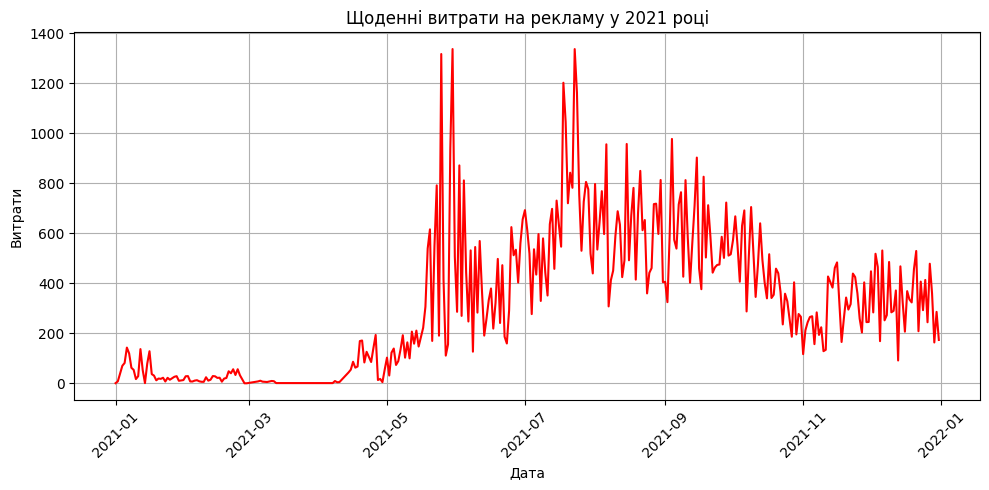

In [24]:
#daily spend
plt.figure(figsize=(10, 5))
plt.plot(daily_2021['ad_date'], daily_2021['total_spend'], color='r')
plt.title('Щоденні витрати на рекламу у 2021 році')
plt.xlabel('Дата')
plt.ylabel('Витрати')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

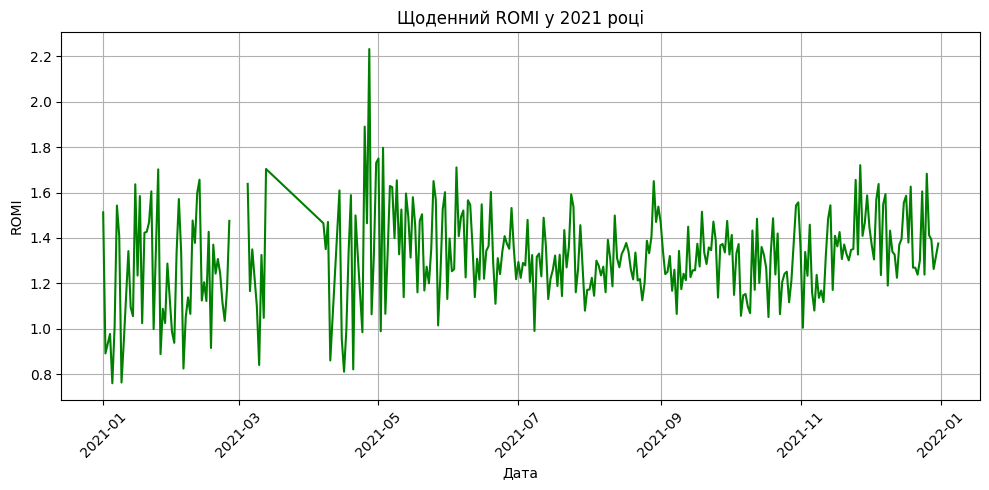

In [25]:
#daily ROMI
plt.figure(figsize=(10, 5))
plt.plot(daily_2021['ad_date'], daily_2021['romi'], color='g')
plt.title('Щоденний ROMI у 2021 році')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **BONUS**

In [26]:
# Рухоме середнє (7 днів)
daily_2021['spend_rolling_avg'] = daily_2021['total_spend'].rolling(window=7).mean()
daily_2021['romi_rolling_avg'] = daily_2021['romi'].rolling(window=7).mean()

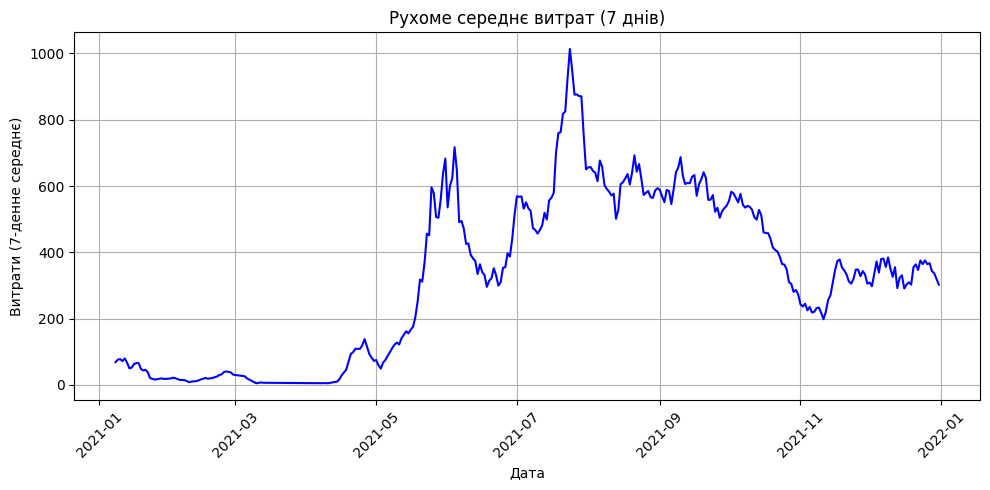

In [27]:
#Графік загальної суми витрат на рекламу в кожній з кампаній
plt.figure(figsize=(10, 5))
plt.plot(daily_2021['ad_date'], daily_2021['spend_rolling_avg'], color='b')
plt.title('Рухоме середнє витрат (7 днів)')
plt.xlabel('Дата')
plt.ylabel('Витрати (7-денне середнє)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

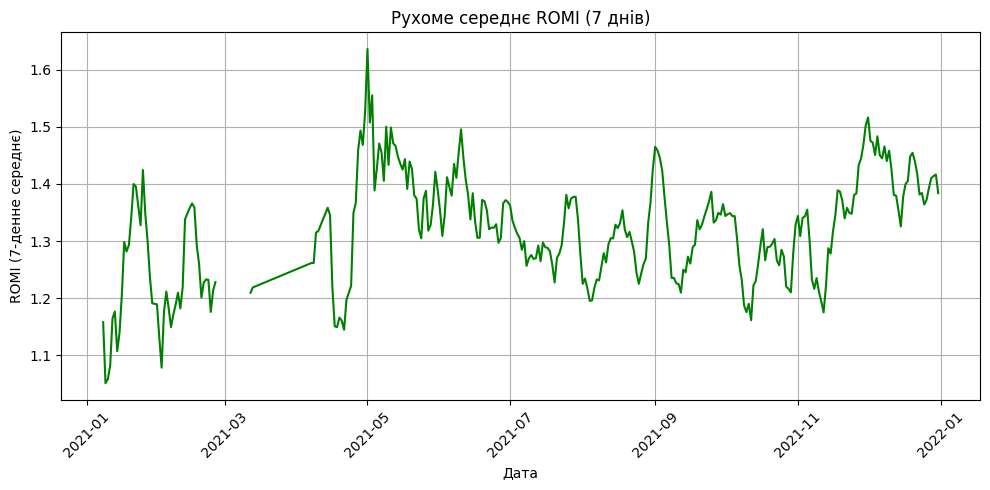

In [28]:
#Загальний ROMI в кожній з кампаній
plt.figure(figsize=(10, 5))
plt.plot(daily_2021['ad_date'], daily_2021['romi_rolling_avg'], color='g')
plt.title('Рухоме середнє ROMI (7 днів)')
plt.xlabel('Дата')
plt.ylabel('ROMI (7-денне середнє)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Групування за назвою кампанії
campaign_grouped = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()


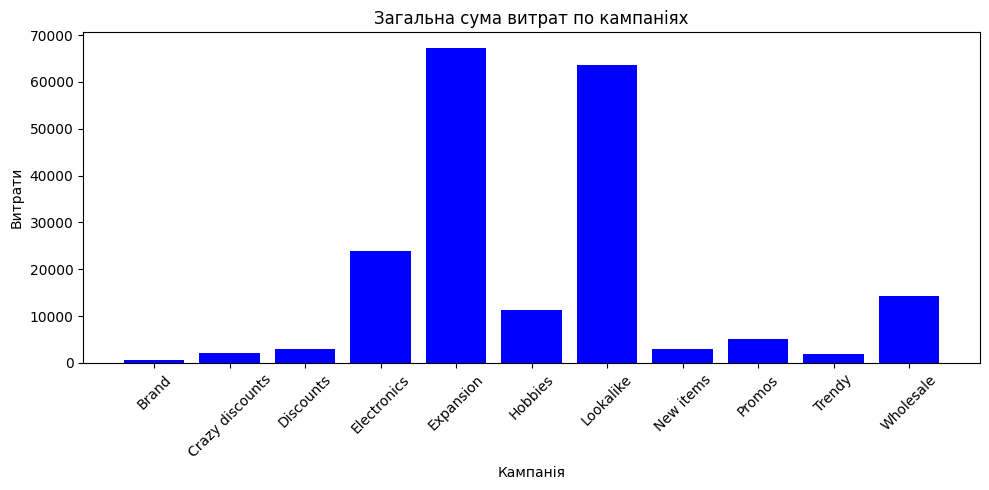

In [30]:
# Графік загальної суми витрат на кожну кампанію
plt.figure(figsize=(10, 5))
plt.bar(campaign_grouped['campaign_name'], campaign_grouped['total_spend'], color='b')
plt.title('Загальна сума витрат по кампаніях')
plt.xlabel('Кампанія')
plt.ylabel('Витрати')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

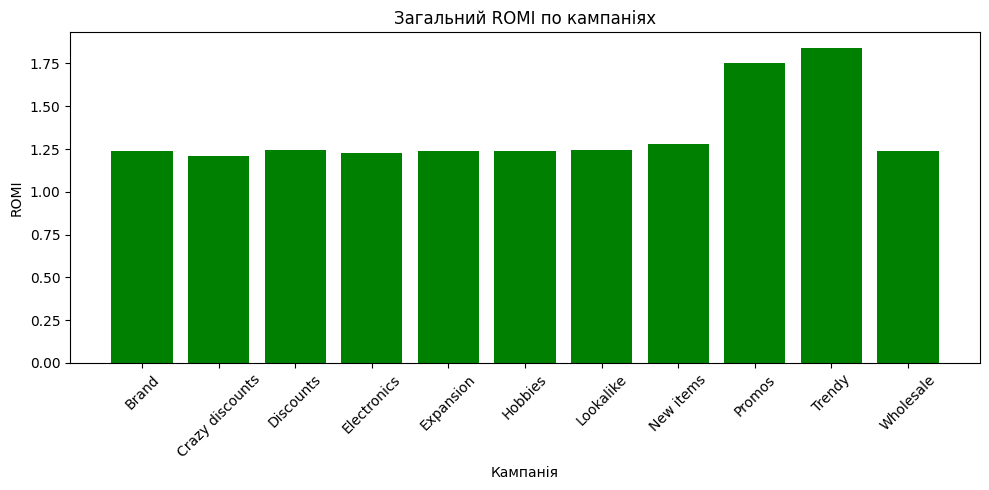

In [31]:
# Графік загального ROMI по кампаніях
plt.figure(figsize=(10, 5))
plt.bar(campaign_grouped['campaign_name'], campaign_grouped['romi'], color='g')
plt.title('Загальний ROMI по кампаніях')
plt.xlabel('Кампанія')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

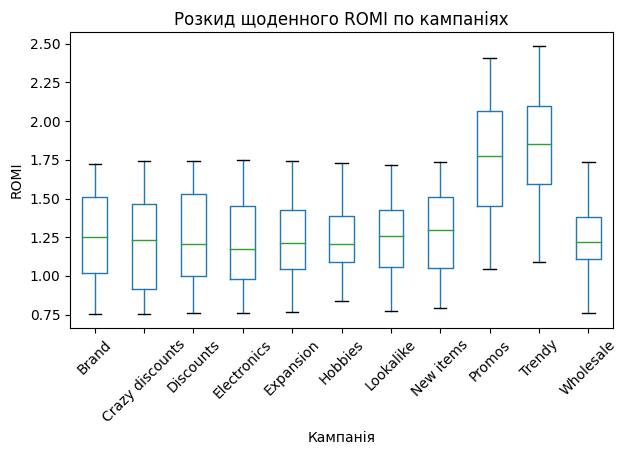

In [32]:
# Побудова box plot для розкиду щоденного ROMI по кампаніях
plt.figure(figsize=(10, 5))
df.boxplot(column='romi', by='campaign_name', grid=False)
plt.title('Розкид щоденного ROMI по кампаніях')
plt.suptitle('')  # Видалення стандартного заголовка
plt.xlabel('Кампанія')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


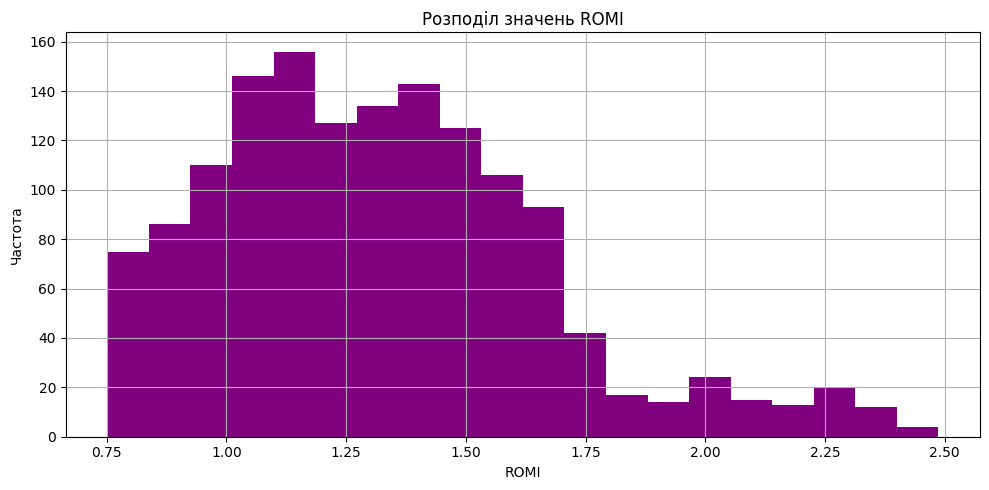

In [33]:
# Гістограма розподілу ROMI
plt.figure(figsize=(10, 5))
plt.hist(df['romi'].dropna(), bins=20, color='purple')
plt.title('Розподіл значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Вибираємо тільки числові стовпці
numeric_df = df.select_dtypes(include=['float64', 'int64'])

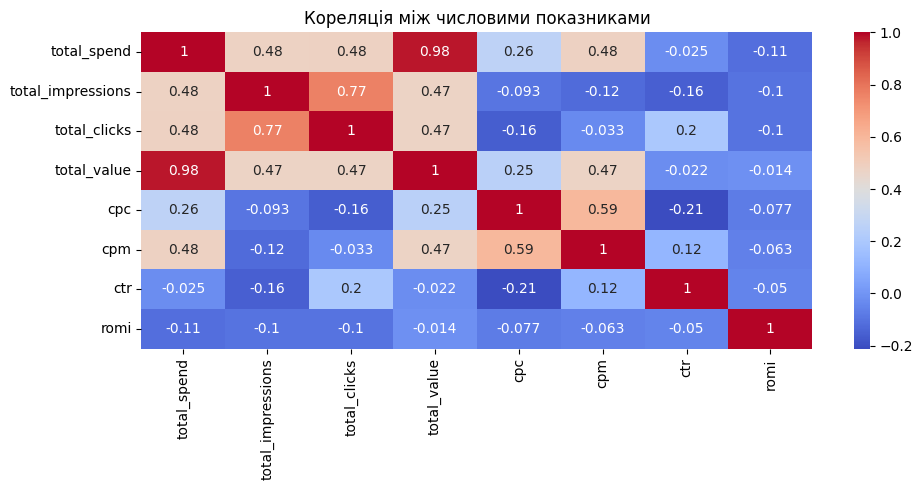

In [38]:
# Теплова карта кореляції між числовими показниками
plt.figure(figsize=(10, 5))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляція між числовими показниками')
plt.tight_layout()
plt.show()

In [39]:
# Виводимо кореляцію "total_value" з іншими числовими показниками
print(correlation_matrix['total_value'])

total_spend          0.978890
total_impressions    0.472037
total_clicks         0.472124
total_value          1.000000
cpc                  0.250851
cpm                  0.471338
ctr                 -0.022267
romi                -0.013733
Name: total_value, dtype: float64
